In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline 

In [2]:
pip install somoclu

     |████████████████████████████████| 6.1 MB 26.3 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp37-cp37m-linux_x86_64.whl size=481075 sha256=3ff8961ca723787170a51196ccbd0ed54717103dd86a21a5e6368839b541bd45
  Stored in directory: /root/.cache/pip/wheels/d5/81/eb/22b023e9cac575c4b87d3f9a7318094124e5d8cf90600726fa
Successfully built somoclu


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


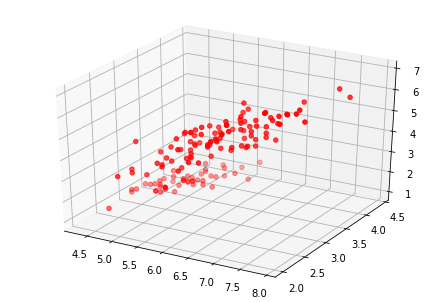

In [10]:
#c1 = np.random.rand(50, 3)/5
c1 = np.genfromtxt('/content/drive/MyDrive/kohonen-maps-master/iris.csv', delimiter=',', usecols=(0, 1, 2, 3), max_rows = 50) 
#c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c2 = np.genfromtxt('/content/drive/MyDrive/kohonen-maps-master/iris.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header = 50, max_rows = 50)
#c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
c3 = np.genfromtxt('/content/drive/MyDrive/kohonen-maps-master/iris.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header=100, max_rows = 50)
#c4 = np.genfromtxt('submission/kohonen-maps/iris.csv', delimiter=',', usecols=(3))
data = np.float32(np.concatenate((c1, c2, c3)))
 
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
colors.extend(["yellow"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], data[:,3], c="red")
labels = range(150)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
%time som.train()

CPU times: user 15 s, sys: 452 µs, total: 15 s
Wall time: 7.67 s


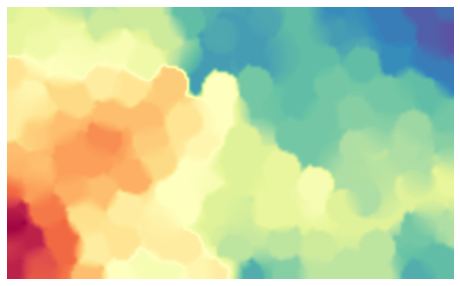

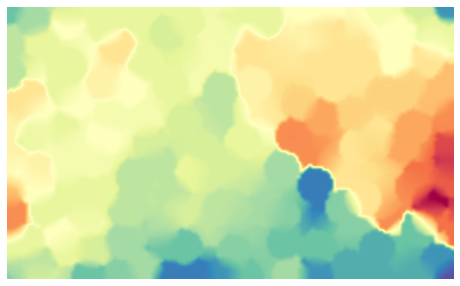

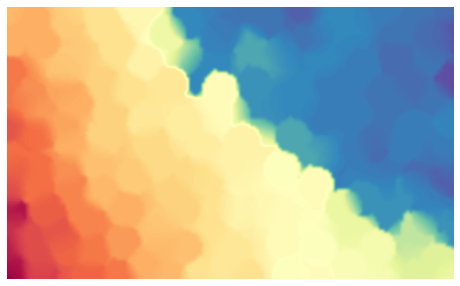

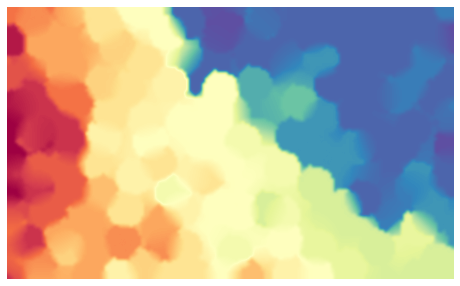

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [12]:
som.view_component_planes()

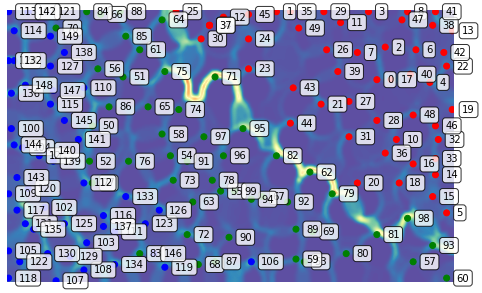

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [13]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

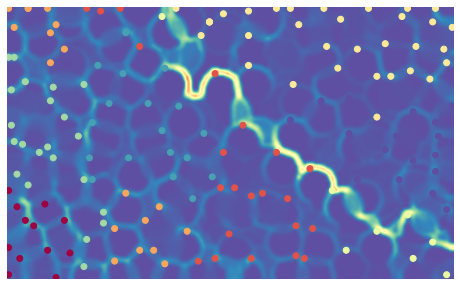

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [14]:
som.cluster()
som.view_umatrix(bestmatches=True)

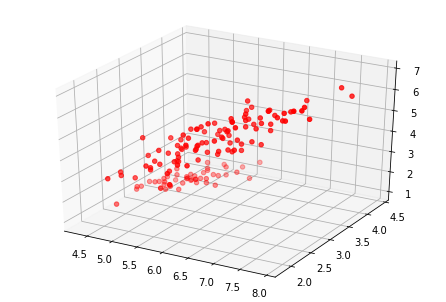

In [16]:
c2_shifted = c2 - 0.2
updated_data = np.float32(np.concatenate((c1, c2_shifted, c3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(updated_data[:, 0], updated_data[:, 1], updated_data[:, 2], c="red")

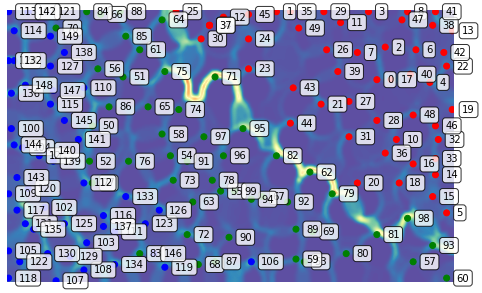

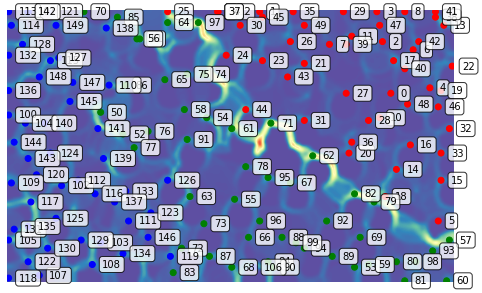

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [17]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=5, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


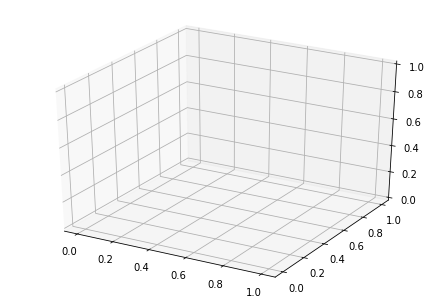

In [20]:
#c1 = np.random.rand(50, 3)/5
c1 = np.genfromtxt('/content/drive/MyDrive/kohonen-maps-master/gsom.csv', delimiter=',', usecols=(0, 1, 2, 3), max_rows = 50) 
#c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c2 = np.genfromtxt('/content/drive/MyDrive/kohonen-maps-master/gsom.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header = 50, max_rows = 50)
#c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
c3 = np.genfromtxt('/content/drive/MyDrive/kohonen-maps-master/gsom.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header=100, max_rows = 50)
#c4 = np.genfromtxt('submission/kohonen-maps/iris.csv', delimiter=',', usecols=(3))
data = np.float32(np.concatenate((c1, c2, c3)))
 
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
colors.extend(["yellow"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], data[:,3], c="blue")
labels = range(150)

In [21]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
%time som.train()

CPU times: user 14.9 s, sys: 19.9 ms, total: 14.9 s
Wall time: 7.59 s


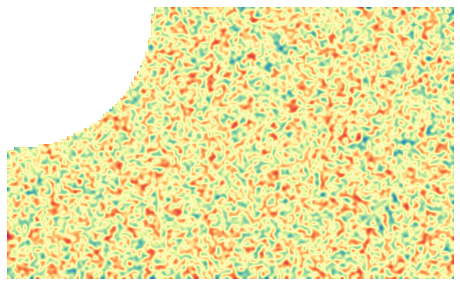

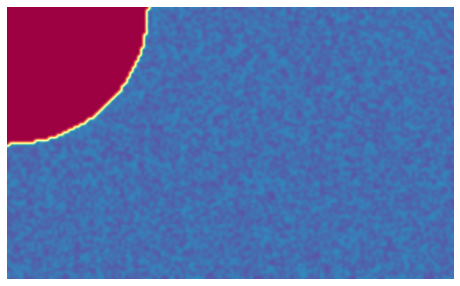

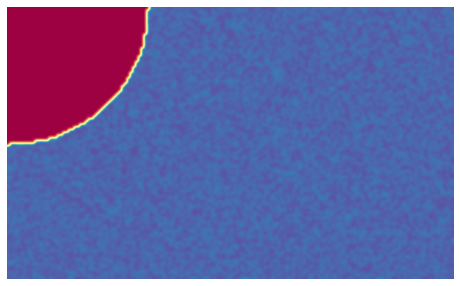

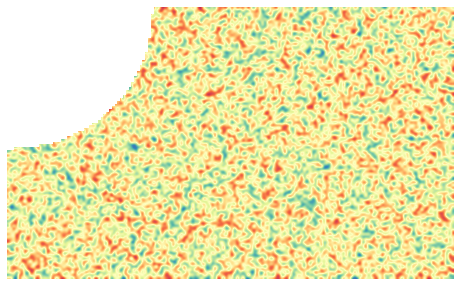

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [22]:
som.view_component_planes()

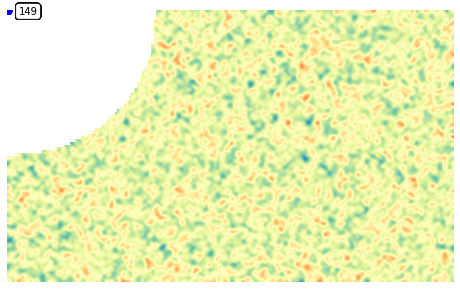

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [23]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

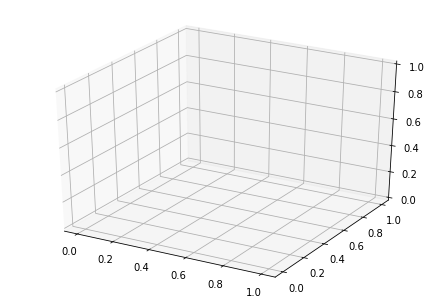

In [25]:
c2_shifted = c2 - 0.2
updated_data = np.float32(np.concatenate((c1, c2_shifted, c3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(updated_data[:, 0], updated_data[:, 1], updated_data[:, 2], c="red")

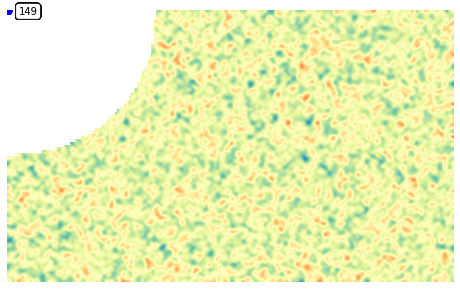

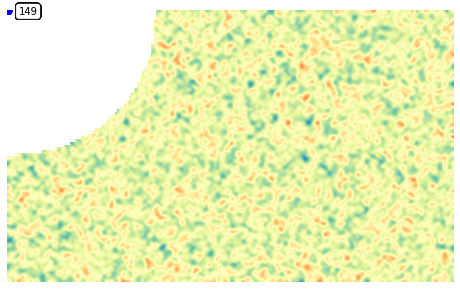

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [26]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=5, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)